# Andres Graterol - 4031393 - Fall 22
# Homework 3 Question 2 

## Generate The Data

In [137]:
# Import our libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [205]:
# Set up a gaussian prior
a = 1/2
m0 = np.transpose(np.zeros(2))
print("Shape of m0:", m0.shape)
print("m0", m0)

s0 = a*np.identity(2)
print("Shape of s0:", s0.shape)
print("s0", s0)

# Does this need to be of length n?
# Does this need to be done in the form of a multivariate gaussian?
#prior = np.random.normal(m0, s0)
prior = multivariate_normal(mean=m0, cov=s0)
print("prior:", prior)

Shape of m0: (2,)
m0 [0. 0.]
Shape of s0: (2, 2)
s0 [[0.5 0. ]
 [0.  0.5]]
prior: <scipy.stats._multivariate.multivariate_normal_frozen object at 0x0000026F96A59D30>


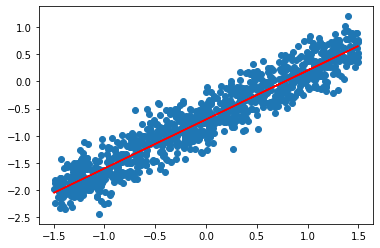

In [66]:
# Variables
N = 1000
variance = 0.25

# Intercept
w0 = -0.7
# slope
w1 = 0.9

# Generating N data points uniform in the interval [-3/2, 3/2]
data_points = np.random.uniform(low = (-3/2), high = (3/2), size = (N,))

noise = np.random.normal(0, variance, len(data_points))

linear_model = w0 + w1*data_points

targets = linear_model + noise
#print(len(targets))

plt.plot(data_points, linear_model, 'red')
plt.scatter(data_points, targets)

## Posterior Update

In [119]:
# Function to compute the design matrix
def compute_design_matrix(input_data):
    matrix = []
    for x in input_data:
        matrix.append([0, x])
    
    #print("Check data", input_data)
    matrix = np.array(matrix)
    #print("Shape of matrix:", matrix.shape)   
    #print(matrix)
    
    return matrix

(1000, 2)
Sn shape: (2, 2)
Mn shape: (2,)
total posterior <scipy.stats._multivariate.multivariate_normal_frozen object at 0x0000026F96A9E460>


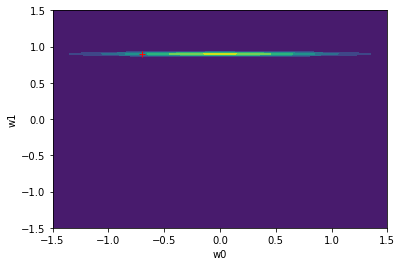

In [192]:
# Plot the posterior of the parameters given all the data x, t
# Obtain the design matrix 
phi = compute_design_matrix(data_points)
print(phi.shape)

Sn = np.linalg.inv(np.linalg.inv(s0) + (1/variance)*(np.matmul(np.transpose(phi), phi)))
Mn = np.matmul(Sn, (np.matmul(np.linalg.inv(s0), m0) + (1/variance)*np.matmul(np.transpose(phi), targets)))
print("Sn shape:", Sn.shape)
print("Mn shape:", Mn.shape)

total_posterior = multivariate_normal(mean=Mn, cov=Sn)
print("total posterior", total_posterior)

X = np.linspace(-3/2, 3/2, N)
Y = np.linspace(-3/2, 3/2, N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))

Z = total_posterior.pdf(pos)

plt.xlabel("w0")
plt.ylabel("w1")
plt.plot(w0, w1, 'r+')
plt.contourf(X, Y, Z)
plt.show()

samples: [array([ 0.623437  , -0.33511988]), array([0.35517384, 0.1866594 ]), array([ 1.11388149, -0.00770917]), array([-0.31906824,  0.76273825]), array([-0.2015864 , -0.84176595]), array([ 1.1594069 , -0.58552768])]


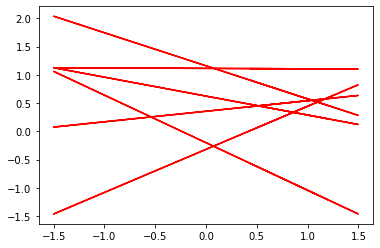

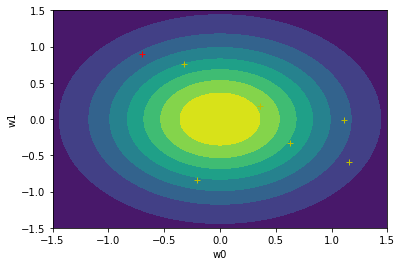

In [211]:
# Plot the assumed multivariate gaussian prior
Z = prior.pdf(pos)

# TODO: Possibly make these deterministic 
#     : CHECK WHY SOMETIMES THEY GO OUT OF RANGE!
# Pick 6 realizations from the prior
# We will pick one to compute the likelihood for 
samples_list = []

for i in range(6):
    samples = prior.rvs()
    samples_list.append(samples)
    
print("samples:", samples_list)

for s in samples_list:
    line = s[0] + s[1]*data_points
    plt.plot(data_points, line, 'red')

plt.show()    

plt.xlabel("w0")
plt.ylabel("w1")
plt.plot(w0, w1, 'r+')
for s in samples_list:
    plt.plot(s[0], s[1], 'y+')
plt.contourf(X, Y, Z)
plt.show()
# Method to update the posterior distribution 
# given a dataset and the prior

Chosen weights: [[0.35517384]
 [0.1866594 ]]
phi [0.         1.19857502]
Shape of weights: (2, 1)
Shape of phi: (2,)
Likelihood mean: [0.22372529]
m shape: (1,)
covariance shape (2, 2)
likelihood: <scipy.stats._multivariate.multivariate_normal_frozen object at 0x0000026F9BEF8250>


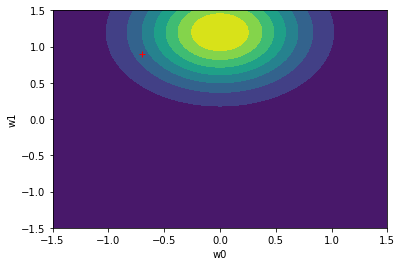

In [212]:
# Now to test the likelihood looks right
# test with the first set of points 
phi_x = np.array([0, data_points[0]])
#phi_x = phi_x[: , np.newaxis]

# Pick an arbitrary weight combination from our samples 
weights = random.choice(samples_list)
weights = weights[: , np.newaxis]

print("Chosen weights:", weights)
print("phi", phi_x)
print("Shape of weights:", weights.shape)
print("Shape of phi:", np.transpose(phi_x).shape)

likelihood_mean = np.matmul(np.transpose(phi_x), weights)
print("Likelihood mean:", likelihood_mean)
print("m shape:", likelihood_mean.shape)

covariance = variance * np.identity(2)
print("covariance shape", covariance.shape)
likelihood = multivariate_normal(mean=np.transpose(phi_x), cov=covariance)
print("likelihood:", likelihood)

Z = likelihood.pdf(pos)

plt.xlabel("w0")
plt.ylabel("w1")
plt.plot(w0, w1, 'r+')
plt.contourf(X, Y, Z)
plt.show()

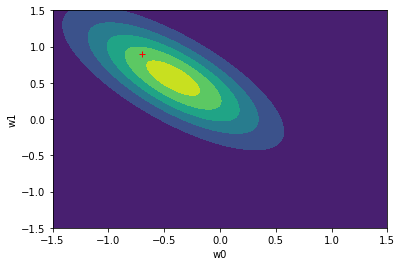

In [213]:
#Sn = np.linalg.inv(np.linalg.inv(s0) + (1/variance)*(np.matmul(np.transpose(phi), phi)))
#Mn = np.matmul(Sn, (np.matmul(np.linalg.inv(s0), m0) + (1/variance)*np.matmul(np.transpose(phi), targets)))

posterior_covariance = np.linalg.inv(np.linalg.inv(s0) + (1/variance)*np.matmul(np.transpose(phi_x), phi_x)) 
posterior_mean = np.matmul(posterior_covariance, (np.matmul(np.linalg.inv(s0), m0) + (1/variance)*np.multiply(np.transpose(phi_x), targets[0])))

posterior = multivariate_normal(mean=posterior_mean, cov=posterior_covariance)

Z = posterior.pdf(pos)

plt.xlabel("w0")
plt.ylabel("w1")
plt.plot(w0, w1, 'r+')
plt.contourf(X, Y, Z)
plt.show()